# Example to read and plot CRMC data

In [1]:
import pyhepmc_ng as hep
import numpy as np
import os, sys
%matplotlib inline
import matplotlib.pyplot as plt

Number of events 100


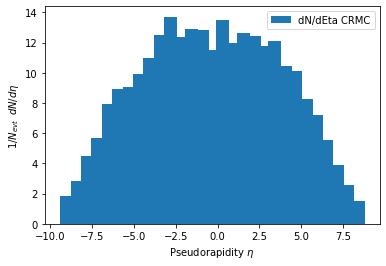

In [5]:
# note, we can so far only read "hepmc3" files, not "hepmc3.gz", thus, 
# either run crmc with "-o hepmc3" or run a dedicated command after crmc to 
# un-compress the files with "gunzip *.gz"

fname = "./crmc_eposlhc_324385492_p_p_6500.hepmc3"  
file = hep.ReaderAscii(fname)

# output plots, binning
dNdEta, dNdEtaBins = np.histogram([], bins=np.linspace(-9,9,30))

# event loop in CRMC output file
evt = hep.GenEvent()
nEvt = 0
for i, evt in enumerate(file):
    
    # event counter
    nEvt += 1

    # plot data collectors per event
    dNdEtaData = [] 
    
    # secondary particle loop
    for p in evt.particles:
        if (p.status != 1):
            continue
        dNdEtaData.append(p.momentum.eta())
        
    dNdEta += np.histogram(dNdEtaData, bins=dNdEtaBins)[0]
    
print ("Number of events {}".format(nEvt))

plt.figure()
binWidth = dNdEtaBins[1:] - dNdEtaBins[0:-1]
plt.bar(dNdEtaBins[:-1], dNdEta/(binWidth*nEvt), label="dN/dEta CRMC")
plt.legend()
plt.xlabel("Pseudorapidity $\eta$")
plt.ylabel("$1/N_{evt} \;\; dN/d\eta$")
plt.show()